# **Sentiment Analysis of Amazon Product Reviews: Predicting Customer Satisfaction**

The core objective of the project, which involves analyzing and predicting the sentiment or satisfaction levels of customers based on their reviews of Amazon brand products.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import warnings
warnings.filterwarnings("ignore")

## **Week 1 and 2 Task:**

    1. Exploratory Data Analysis (EDA):
    2. Feature Engineering:
    3. Classifier Selection:
    4. Tackling Class Imbalance:
    5. Evaluation Metrics:



In [ ]:
train=pd.read_csv('/content/train_data.csv')
train.head()

,Name,Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [ ]:
test_val=pd.read_csv('/content/test_data_hidden.csv')
test_val.head()

,Name,Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [ ]:
test= pd.read_csv("/content/test_data.csv")
test.head()

,Name,Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


**1. Exploratory Data Analysis**

In [ ]:
train.duplicated().sum()

58

In [ ]:
test.duplicated().sum()

3

In [ ]:
test_val.duplicated().sum()

3

From above it is clear that there are 58 duplicate record in train data and 3 duplicate record in test data.

In [ ]:
train.drop_duplicates(inplace=True)

In [ ]:
train.duplicated().sum()

0

In [ ]:
train.shape

(3942, 8)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3942 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               3942 non-null   object
 1   Brand              3942 non-null   object
 2   categories         3942 non-null   object
 3   primaryCategories  3942 non-null   object
 4   reviews.date       3942 non-null   object
 5   reviews.text       3942 non-null   object
 6   reviews.title      3932 non-null   object
 7   sentiment          3942 non-null   object
dtypes: object(8)
memory usage: 277.2+ KB


In train data, reviews.title have 10 missing values.

For positive Sentiment

In [ ]:
train[train.sentiment=='Positive'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
0,Purchased on Black FridayPros - Great Price (e...,Powerful tablet
1,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME
3,"very good product. Exactly what I wanted, and ...",Greattttttt
4,This is the 3rd one I've purchased. I've bough...,Very durable!
5,This is a great product. Light weight. I wish ...,You will love it
7,Purchased this for my son. Has room to upgrade...,Great for kids or smaller needs
8,Bought this for my mom and it was just what sh...,Great tablet
10,"I got this tablet to replace my sons old one, ...",Great Tablet
11,Great product for the kids gaming apps parenta...,Works great
12,Love the choice of colors. Have two kindles of...,great pad for both children and adults


In [ ]:
train[train.sentiment=='Neutral'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
2,Just an average Alexa option. Does show a few ...,Average
6,My 7-year old daughter saved up to by this. He...,OK For Entry Level Tablet
17,"Not as good as before the old kindle, just sea...",Not as good as before
59,There is nothing spectacular about this item b...,"Does what it says, missing one key feature"
95,It's unfair for me to rate this product cause ...,Haven't set it up yet
114,I bought this as s present for my 65 year old ...,Solid tablet
146,Bought this tablet for 8 year old. It holding ...,Fire tablet
147,bought a few kindles in the past but this time...,Came defective
148,"Not a substitute for an iPad, but a really goo...",Good Reader
187,This device is a good if you are looking for a...,Good for 4 year old


In [ ]:
train[train.sentiment=='Negative'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
9,"was cheap, can not run chrome stuff, returned ...","was cheap, can not run chrome stuff, returned"
97,"Worthless, except as a regular echo and a poor...",Useless screen so why pay for it?
104,Too bad Amazon turned this tablet into a big a...,Amazon Fire 7 Tablet
121,I bought this Kindle for my 7 year old grand-d...,Kid's Kindle
150,I am reading positive reviews and wish I could...,Have never purchased a more frustrating Device
151,I have to say it was a little confusing and fr...,not big fan
249,It's a good device for children because they d...,Good for kids
267,the speaker voice quality is terrible compare ...,"terrible product,bad voice quality"
368,Needs to be a stand alone device. I should hav...,Needs to be a stand alone device
530,Has a very good Bluetooth speakers sound quali...,Good Bluetooth speaker


In [ ]:
train.sentiment.value_counts()

,count
sentiment,
Positive,3694
Neutral,158
Negative,90


# **Class Imbalance**
The data of training data set is imbalanced. As positive sentiments are 3694 out of 3942 which is around 94% of total data.

In [ ]:
pd.DataFrame(train.Name.value_counts())

,count
Name,
"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",676
"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",628
Amazon - Echo Plus w/ Built-In Hub - Silver,483
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",446
"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue",340
"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",294
Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker,177
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",175
"Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers",122


In [ ]:
train.Brand.value_counts()

,count
Brand,
Amazon,3942


In [ ]:
train.primaryCategories.value_counts()

,count
primaryCategories,
Electronics,2562
"Electronics,Hardware",1159
"Office Supplies,Electronics",204
"Electronics,Media",17


In [ ]:
pd.DataFrame(train.categories.value_counts())

,count
categories,
"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets",628
"Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,Computer Accessories,Home & Tools,See more Amazon Echo Show Smart Assistant - White,Smart Home Automation,Electronics,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Consumer Electronics,Wireless Speakers,Home Improvement,Amazon Home,Amazon,Computer Speakers,Voice-Enabled Smart Assistants",514
"Amazon Echo,Smart Home,Networking,Home & Tools,Home Improvement,Smart Home Automation,Voice Assistants,Amazon Home,Amazon,Smart Hub & Kits,Digital Device 3",483
"Computers,Fire Tablets,Electronics Features,Computer Accessories,Tablets,Top Rated,Amazon Tablets,Electronics,Kids' Tablets,iPad & Tablets,Cases & Bags,Electronics, Tech Toys, Movies, Music,Computers & Tablets",446
"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets",340
"Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Frys,Computers & Tablets,Tablets & eBook Readers",294
"Fire Tablets,Tablets,All Tablets,Amazon Tablets,Computers & Tablets",231
"Amazon Echo,Home Theater & Audio,MP3 MP4 Player Accessories,Electronics,Portable Audio,Compact Radios Stereos,Smart Hubs & Wireless Routers,Featured Brands,Smart Home & Connected Living,Home Security,Kindle Store,Electronic Components,Home Automation,Mobile Bluetooth Speakers,Home, Garage & Office,Amazon Tap,Home,Mobile Speakers,TVs & Electronics,Portable Bluetooth Speakers,Bluetooth & Wireless Speakers,Electronics Features,Frys,Speakers,Mobile,Digital Device 3,Smart Home,Home Improvement,Electronics, Tech Toys, Movies, Music,Smart Home & Home Automation Devices,Smart Hubs,MP3 Player Accessories,Home Safety & Security,Voice Assistants,Amazon Home,Alarms & Sensors,Portable Audio & Electronics,Amazon Devices,Audio,Bluetooth Speakers,MP3 Accessories,All Bluetooth & Wireless Speakers",177
"Amazon Echo,Virtual Assistant Speakers,Electronics Features,Home & Tools,Smart Home Automation,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Wireless Speakers,Smart Home,Home Improvement,Voice Assistants,Amazon Home,Amazon",162


In [ ]:
train.dtypes

,0
Name,object
Brand,object
categories,object
primaryCategories,object
reviews.date,object
reviews.text,object
reviews.title,object
sentiment,object


# **Data Cleaning**

In [ ]:
del train['Brand']
del test_val['Brand']
del test['Brand']

In [ ]:
train['reviews.date'] = train['reviews.date'].str.split('T').str[0]
test_val['reviews.date'] = test_val['reviews.date'].str.split('T').str[0]
test['reviews.date'] = test['reviews.date'].str.split('T').str[0]

train['reviews_day'] = pd.to_datetime(train['reviews.date'], format='%Y-%m-%d').dt.day
train['reviews_month'] = pd.to_datetime(train['reviews.date'], format='%Y-%m-%d').dt.month
train['reviews_year'] = pd.to_datetime(train['reviews.date'], format='%Y-%m-%d').dt.year

test_val['reviews_day'] = pd.to_datetime(test_val['reviews.date'], format='%Y-%m-%d').dt.day
test_val['reviews_month'] = pd.to_datetime(test_val['reviews.date'], format='%Y-%m-%d').dt.month
test_val['reviews_year'] = pd.to_datetime(test_val['reviews.date'], format='%Y-%m-%d').dt.year

test['reviews_day'] = pd.to_datetime(test['reviews.date'], format='%Y-%m-%d').dt.day
test['reviews_month'] = pd.to_datetime(test['reviews.date'], format='%Y-%m-%d').dt.month
test['reviews_year'] = pd.to_datetime(test['reviews.date'], format='%Y-%m-%d').dt.year

del train['reviews.date']
del test['reviews.date']
del test_val['reviews.date']

train.head()

,Name,categories,primaryCategories,reviews.text,reviews.title,sentiment,reviews_day,reviews_month,reviews_year
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,26,12,2016
1,Amazon - Echo Plus w/ Built-In Hub - Silver,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,17,1,2018
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",Just an average Alexa option. Does show a few ...,Average,Neutral,20,12,2017
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...","eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics","very good product. Exactly what I wanted, and ...",Greattttttt,Positive,4,8,2017
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...","Computers/Tablets & Networking,Tablets & eBook...",Electronics,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,23,1,2017


# **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
name = list(set(list(train['Name'])+list(test_val['Name'])))
categories = list( set( list( train['categories']) + list(test_val['categories'])))
primaryCategories = list(train['primaryCategories'].unique())

le_name = LabelEncoder()
le_cat = LabelEncoder()
le_pri = LabelEncoder()
le_name.fit(name)
le_cat.fit(categories)
le_pri.fit(primaryCategories)

train['name'] = le_name.transform(train.Name)
train['categories'] = le_cat.transform(train.categories)
train['primaryCategories'] = le_pri.transform(train.primaryCategories)
test_val['name'] = le_name.transform(test_val.Name)
test_val['categories'] = le_cat.transform(test_val.categories)
test_val['primaryCategories'] = le_pri.transform(test_val.primaryCategories)
test['name'] = le_name.transform(test.Name)
test['categories'] = le_cat.transform(test.categories)
test['primaryCategories'] = le_pri.transform(test.primaryCategories)

In [ ]:
train['reviews.title'].fillna(value=' ',inplace=True)
test_val['reviews.title'].fillna(value=' ',inplace=True)
test['reviews.title'].fillna(value=' ',inplace=True)

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud

In [ ]:
tok = WordPunctTokenizer()
ps = PorterStemmer()
wnl = WordNetLemmatizer()
neg_dict = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}

neg_pattern = re.compile(r'\b(' + '|'.join(neg_dict.keys()) + r')\b')

In [ ]:
def data_cleaner(text):
    text = text.replace(r"Äú",'')
    text = text.replace(r'Äù','')
    text = text.replace(r'‚Äô','\'')
    text = text.lower()
    text = text.replace(r'‚Äô','\'')
    text = neg_pattern.sub(lambda x: neg_dict[x.group()], text)
    text = re.sub("[^a-zA-Z0-9\"]", " ", text)
    word_tok=[x for x in tok.tokenize(text) if len(x) > 3]
    word_lem = [wnl.lemmatize(i) for i in word_tok]
    return (" ".join(word_lem).strip())

In [ ]:
for i in (train,test_val,test):
    i['reviews.text']=i['reviews.text'].apply(data_cleaner)
    i['reviews.title']=i['reviews.title'].apply(data_cleaner)

In [ ]:
test[['reviews.text','reviews.title']].head(10)

# **Visualization**

In [ ]:
# Calculate the length of review texts in the training and test datasets
train_len = train["reviews.text"].str.len()
test_len = test["reviews.text"].str.len()

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot the histograms for training and test reviews
plt.hist(train_len, bins=20, label="Training Reviews", alpha=0.7, color='skyblue', edgecolor='black')
plt.hist(test_len, bins=20, label="Test Reviews", alpha=0.7, color='lightgreen', edgecolor='black')

# Add legend
plt.legend()

# Set limits for the x-axis
plt.xlim(0, 2000)

# Label the axes
plt.xlabel('Characters')
plt.ylabel('Reviews Count')

# Set title for the plot
plt.title('Distribution of Review Text Lengths')

# Add grid lines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [ ]:
all_text = ' '.join([text for text in train['reviews.text']])
pos_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Positive']])
neg_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Negative']])
neu_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Neutral']])

In [ ]:
# Generate the word cloud
wordcloud = WordCloud(
    width=1600,
    height=800,
    random_state=21,
    max_font_size=180,
    min_font_size=10,
    background_color='white',
    colormap='viridis',
    max_words=200,
    stopwords=None
).generate(pos_text)

# Create the figure and axis
plt.figure(figsize=(12, 10))

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')
plt.margins(x=0, y=0)

# Show the plot
plt.show()

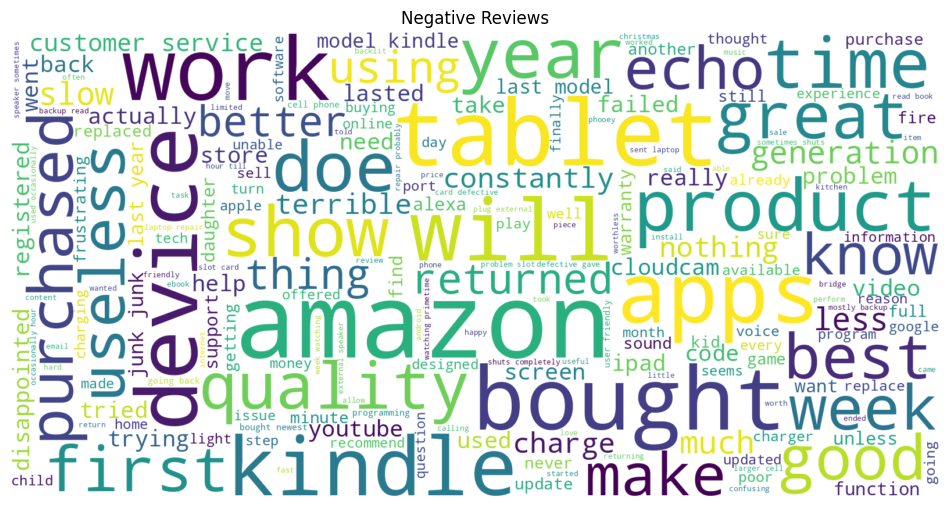

In [ ]:
# Generate the word cloud
wordcloud = WordCloud(
    width=1600,
    height=800,
    random_state=21,
    max_font_size=180,
    min_font_size=10,
    background_color='white',
    colormap='viridis',
    max_words=200,
    stopwords=None
).generate(neg_text)

# Create the figure and axis
plt.figure(figsize=(12, 10))

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')
plt.margins(x=0, y=0)

# Show the plot
plt.show()

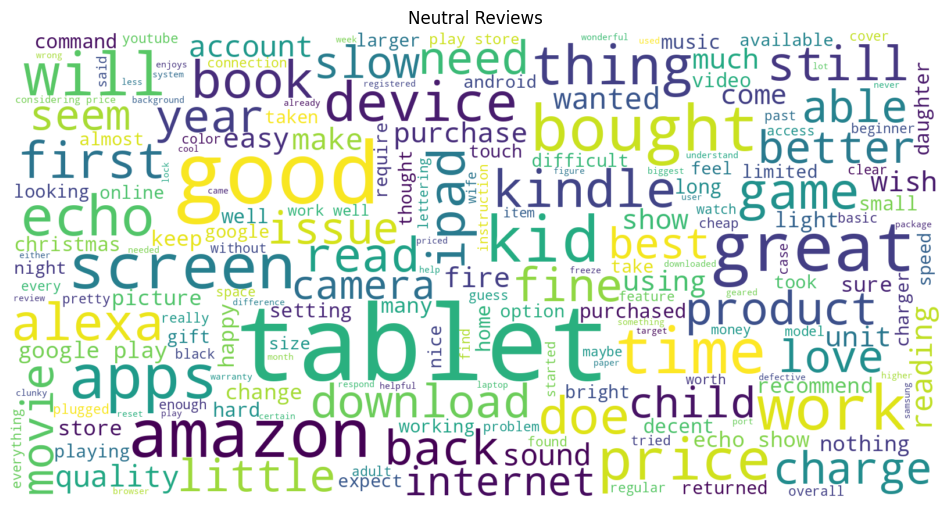

In [ ]:
# Generate the word cloud
wordcloud = WordCloud(
    width=1600,
    height=800,
    random_state=21,
    max_font_size=180,
    min_font_size=10,
    background_color='white',
    colormap='viridis',
    max_words=200,
    stopwords=None
).generate(neu_text)

# Create the figure and axis
plt.figure(figsize=(12, 10))

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Reviews')
plt.margins(x=0, y=0)

# Show the plot
plt.show()

In [ ]:
le_senti = LabelEncoder()
train['sentiment'] = le_senti.fit_transform(train['sentiment'])
test_val['sentiment'] = le_senti.fit_transform(test_val['sentiment'])

In [ ]:
train.head()

,Name,categories,primaryCategories,reviews.text,reviews.title,sentiment,reviews_day,reviews_month,reviews_year,name
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",10,0,purchased black fridaypros great price even sa...,powerful tablet,2,26,12,2016,2
1,Amazon - Echo Plus w/ Built-In Hub - Silver,1,1,purchased amazon echo plus dot plus four fire ...,amazon echo plus awesome,2,17,1,2018,5
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,2,1,just average alexa option doe show thing scree...,average,1,20,12,2017,9
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",22,3,very good product exactly what wanted very goo...,greattttttt,2,4,8,2017,14
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",9,0,this purchased bought niece other case compare...,very durable,2,23,1,2017,13


# **TFIDF Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
tvec1 = TfidfVectorizer()
tvec2 = TfidfVectorizer()
tvec3 = TfidfVectorizer()

In [ ]:
train1 = train.reset_index()
combi1=pd.concat([train1,test_val],axis=0,join='outer')

tvec1.fit(combi1['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train1['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val['reviews.text']).toarray())

tvec2.fit(combi1['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train1['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val['reviews.title']).toarray())

Train1 = pd.concat([train1.drop(['reviews.text','reviews.title','sentiment','index','Name'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val1 = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment','Name'],axis=1),tvec_text2, tvec_title2],axis=1)

x_train1=Train1.values
y_train1=train['sentiment'].values

x_val1=Test_Val1.values
y_val1 = test_val['sentiment'].values

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction import text

In [ ]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)

stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

tvec3 = TfidfVectorizer(stop_words = list(stop_words), tokenizer = tokenize, max_features = 1000)

reviews=tvec3.fit_transform(combi1['reviews.text'])
words = tvec3.get_feature_names_out()

# **Multinomial Naive Bayes**

In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,precision_score, recall_score,roc_curve, roc_auc_score, auc


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train1['reviews.text'], train1['sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Fit the Multinomial Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Predict on the validation set
y_pred = nb.predict(X_val_tfidf)

# Evaluate the model
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print(accuracy_score(y_val, y_pred)*100)

Positive sentiment is revealed as data is imbalanced.

# **Tackeling Imbalaced data**

In [ ]:
train.sentiment.value_counts()

In [ ]:
count_2, count_1, count_0 =train.sentiment.value_counts()
class_2 = train[train.sentiment==2]
class_1 = train[train.sentiment==1]
class_0 = train[train.sentiment==0]
count_2, count_1, count_0

Undersampling the data

In [ ]:
class_2_under = class_2.sample(count_1)
train_under= pd.concat([class_2_under,class_1,class_0],axis=0)
print(train_under.shape)
print(train_under.sentiment.value_counts())

Oversampling the data

In [ ]:
class_0_over = class_0.sample(count_2,replace=True)
class_1_over = class_1.sample(count_2,replace=True)
train_over = pd.concat([class_2,class_0_over,class_1_over],axis=0)
print(train_over.shape)
print(train_over.sentiment.value_counts())

In [ ]:
lr= LogisticRegression(C=30, class_weight='balanced', solver='sag',
                         multi_class='multinomial', n_jobs=6, random_state=40,
                         verbose=1, max_iter=1000)

# **TFIDF Vectorizer on under-sampled data**

In [ ]:
train = train_under.reset_index(drop=True)
#combi = train.append(test_val,ignore_index=True)
combi=pd.concat([train,test_val],axis=0,join='outer')
print(combi.shape)

tvec1.fit(combi['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val['reviews.text']).toarray())

tvec2.fit(combi['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val['reviews.title']).toarray())

Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment','Name'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment','Name'],axis=1),tvec_text2, tvec_title2],axis=1)
x_train=Train.values
y_train=train['sentiment']
x_val=Test_Val.values
y_val = test_val['sentiment']

# **Logistic Regression on under-sampled data**

In [ ]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print('accuracy : ',accuracy_score(y_val, y_pred)*100)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression of under -sampled data')
plt.legend(loc="lower right")
plt.show()

# **TFIDF Vectorizer on over-sampled data**

In [ ]:
train = train_over.reset_index(drop=True)

tvec1.fit(train['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val['reviews.text']).toarray())

tvec2.fit(train['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val['reviews.title']).toarray())

Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment','Name'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment','Name'],axis=1),tvec_text2, tvec_title2],axis=1)

Train.to_csv('Train.csv',encoding='utf-8')
Test_Val.to_csv('Test_Val.csv',encoding='utf-8')

x_train=Train.values
y_train=train['sentiment'].values
x_val=Test_Val.values
y_val = test_val['sentiment'].values

# **Logistic Regression on over-sampled data**

In [ ]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print('accuracy : ',accuracy_score(y_val, y_pred)*100)

In [ ]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Receiver operating characteristic for Logistic Regression of over-sampled data')
plt.legend(loc="lower right")
plt.show()

Logistic Regression on over-sampled data is perfrorming better than under-sampled data

# **Multinomial Naive Bayes**

In [ ]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print(accuracy_score(y_val, y_pred)*100)
print(nb.score(x_train,y_train))
print(nb.score(x_val,y_val))

In [ ]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Multinomial Naive Bayes Classifier')
plt.legend(loc="lower right")
plt.show()

# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf= RandomForestClassifier(n_estimators=400,random_state=10).fit(x_train,y_train)
y_pred=rf.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print('accuracy : ',accuracy_score(y_val, y_pred)*100)
print(rf.score(x_train,y_train))
print(rf.score(x_val,y_val))

In [ ]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

# **XGBClassifier**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb= XGBClassifier(n_estimators=1000,max_depth=6).fit(x_train,y_train)
y_pred=xgb.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print("accuracy : ",accuracy_score(y_val, y_pred)*100)

In [ ]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of XGBClassifier')
plt.legend(loc="lower right")
plt.show()

**We can see that XGBoost is performing better in predicting all the classes.**

# **Week 3 & 4: Model Selection and Advanced Techniques**
**Multi-class SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0).fit(x_train, y_train)
y_pred=svc.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print("accuracy : ",accuracy_score(y_val, y_pred)*100)

In [ ]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of multiclass SVM Classifier')
plt.legend(loc="lower right")
plt.show()

# **Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import class_weight
from sklearn.preprocessing import label_binarize
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Dropout,GRU
from keras.models import Sequential
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler

In [ ]:
y_train2 = label_binarize(y_train1, classes=[0, 1, 2])

In [ ]:
classifier = Sequential()
classifier.add(Dense(units=100,kernel_initializer='he_uniform',activation='relu',input_dim=x_train1.shape[1]))
classifier.add(Dense(units=80,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=80,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))
#Compile and Run
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(x_train1,y_train2,batch_size=256,epochs=100,verbose=0)
#Evaluate
y_pred = classifier.predict(x_val1, batch_size=256)

y_pred_bool = np.argmax(y_pred, axis=1)
# label
y_test = np.argmax(y_val1, axis=1)

print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

In [ ]:
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train1),
                                                  y=y_train1)
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

In [ ]:
classifier = Sequential()
classifier.add(Dense(units=50,activation='relu',input_dim=x_train1.shape[1]))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(x_train1,y_train2,batch_size=256,epochs=100,class_weight=class_weight_dict,verbose=0)
y_pred = classifier.predict(x_val1, batch_size=256)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)
print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

class-weights does not improve the performance

In [ ]:
#using dropouts
classifier = Sequential()
classifier.add(Dense(units=50,activation='relu',input_dim=x_train1.shape[1]))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(x_train1,y_train2,batch_size=256,epochs=100,class_weight=class_weight_dict,verbose=0)
y_pred = classifier.predict(x_val1, batch_size=256)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)
print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

In [ ]:
y_train3 = label_binarize(y_train, classes=[0, 1, 2])

In [ ]:
#for over-sampled data
classifier = Sequential()
classifier.add(Dense(units=50,activation='relu',input_dim=x_train.shape[1]))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dense(units=150,activation='relu'))
classifier.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(x_train,y_train3,batch_size=256,epochs=10,verbose=0)
y_pred = classifier.predict(x_val, batch_size=256)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)
print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

Using Over-sampled data for neural network does not improve the performance

# **Sentiment Score**

In [ ]:
from textblob import TextBlob
def senti(x):
    return TextBlob(x).sentiment
def polarity(x):
    return TextBlob(x).polarity+1

train['senti_score'] = train['reviews.text'].apply(senti)
test_val['senti_score'] = test_val['reviews.text'].apply(senti)

train['polarity'] =train['reviews.text'].apply(polarity)
test_val['polarity'] = test_val['reviews.text'].apply(polarity)

train.senti_score.head()

In [ ]:
Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment','senti_score','Name'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment','senti_score','Name'],axis=1),tvec_text2, tvec_title2],axis=1)
x_train=Train.values
y_train=train['sentiment']
x_val=Test_Val.values
y_val = test_val['sentiment']

In [ ]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print(accuracy_score(y_val, y_pred)*100)
print(nb.score(x_train,y_train))
print(nb.score(x_val,y_val))

Sentiment Score does not have much affect on the performance

# **Project Task: Week 4**

LSTM

In [ ]:
y_train2 = label_binarize(y_train1, classes=[0, 1, 2])
epochs = 4
emb_dim = 128
batch_size = 256
model = Sequential()
model.add(Embedding(5000, emb_dim, input_length=x_train1.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train1, y_train2, epochs=epochs, batch_size=batch_size)
y_pred = model.predict(x_val1, batch_size=100)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)

print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))